<a href="https://colab.research.google.com/github/tempzeba/iot_test_public/blob/main/A1L02007_log_20201119_(DNN_tensorflow2_0)_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) 程式說明
### 目的：A1L02007 IOT異常分析
### 運行環境：

In [ ]:
import sys
print("python版本:%s"% sys.version)

python版本:3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option('max_row',500)

## 1) 載入資料集

In [ ]:
# df_train = pd.read_csv('./data/Iris.csv')
df_train = pd.read_csv('https://github.com/tempzeba/iot_test_public/releases/download/iot_data/A1L02007_log_01.csv', sep='\t')
df_train = df_train.drop(labels=[ 
r'收集日期',
r'抽樣秒',
r'位址區段B0紀錄時間',
r'位址區段W10紀錄時間',
r'位址區段W1200紀錄時間',
r'位址區段W200紀錄時間',
r'位址區段W2004紀錄時間'
,
 'A001. 空壓源SN#1異常',
 'A010. 真空源SN#1異常',
 'A020. EMO觸發異常',
 'A030. CPU異常',
 'A031. RD77MS16模組異常',
 'A032. RS-485模組異常',
 'A033. R64AD模組異常',
 'A050. CPU電池 電力低下',
 'A051. PLC保險絲燒毀',
 'A052. PLC偵測 AC/DC 電力低下',
 'A100. 轉塔伺服R軸異常',
 'A101. 真空鼓R軸伺服異常',
 'A102. 刀鼓R軸伺服異常',
 'A103. 旋轉刀R軸伺服異常',
 'A104. 轉瓶01伺服R軸異常',
 'A105. 送標伺服R軸異常',
 'A106. 螺桿01伺服R軸異常',
 'A107. 膠鼓伺服R軸伺服異常',
 'A108. 標捲A伺服R軸異常',
 'A109. 標捲B伺服R軸異常',
 'A110. 轉塔伺服Z軸異常',
 'A111. 貼標主機伺服Z軸異常',
 'A112. 貼標主機伺服Y軸異常',
 'A113. 虛擬軸01伺服R軸異常',
 'A114. 螺桿02伺服R軸異常',
 'A115. 轉瓶02伺服R軸異常',
 'A116. 轉瓶03伺服R軸異常',
 'A117. 轉瓶04伺服R軸異常',
 'A118. 轉瓶05伺服R軸異常',
 'A119. 轉瓶06伺服R軸異常',
 'A120. 轉瓶07伺服R軸異常',
 'A121. 轉瓶08伺服R軸異常',
 'A122. 轉瓶09伺服R軸異常',
 'A123. 轉瓶10伺服R軸異常',
 'A124. 轉瓶11伺服R軸異常',
 'A125. 轉瓶12伺服R軸異常',
 'A126. 轉瓶13伺服R軸異常',
 'A127. 轉瓶14伺服R軸異常',
 'A128. 轉瓶15伺服R軸異常',
 'A129. 轉瓶16伺服R軸異常',
 'A130. 轉瓶17伺服R軸異常',
 'A131. 轉瓶18伺服R軸異常',
 'A321. 操作側01門檢異常',
 'A322. 操作側02門檢異常',
 'A323. 維修側01門檢異常',
 'A324. 維修側02門檢異常',
 'A330.轉刀Index Sensor異常',
 'A331.標籤MarkSensor異常',
 'A340. 標籤斷標異常',
 'A345. 張力位置不正確',
 'A350. 入料星盤跳齒異常',
 'A351. 出料星盤跳齒異常',
 'A360. 真空標籤檢查異常',
 'A361. 真空鼓沾膠標籤檢查異常',
 'A362. 真空鼓漏貼標籤檢查異常',
 'A364. 螺桿進瓶異常',
 'A365. 進瓶甩瓶檢查異常',
 'A366. 貼標甩瓶檢查異常',
 'A367. 出瓶甩瓶檢查異常',
 'A370. 倒瓶偵測異常',
 'A371. 標籤切斷位置不正確',
 'A380. Roll Fed變頻器異常',
 'A381. Vacuum變頻器異常',
 'A382. 膠泵變頻器異常',
 'A383. 主輸送帶變頻器異常',
 'A390. 膠鼓加熱器斷線異常',
 'A391. 膠桶加熱器斷線異常',
 'A392. 出膠板加熱器斷線異常',
 'A393. 刮膠板加熱器斷線異常',
 'A394. 盛料盤加熱器斷線異常',
 'A395. 膠管加熱器斷線異常',
 'A401. 轉塔伺服R軸未設原點',
 'A402. 真空鼓伺服R軸未設原點',
 'A403. 刀鼓伺服R軸未設原點',
 'A404. 旋轉刀伺服R軸未設原點',
 'A405. 轉瓶01伺服R軸未設原點',
 'A406. 送標伺服R軸未設原點',
 'A407. 螺桿01伺服R軸未設原點',
 'A408. 膠鼓伺服R軸未設原點',
 'A409. 標捲A伺服R軸未設原點',
 'A410. 標捲B伺服R軸未設原點',
 'A411. 轉塔伺服Z軸未設原點',
 'A412. 貼標主機伺服Z軸未設原點',
 'A413. 貼標主機伺服Y軸未設原點',
 'A414. 虛擬軸01伺服R軸未設原點',
 'A415. 螺桿02伺服R軸未設原點',
 'A416. 轉瓶02伺服R軸未設原點',
 'A417. 轉瓶03伺服R軸未設原點',
 'A418. 轉瓶04伺服R軸未設原點',
 'A419. 轉瓶05伺服R軸未設原點',
 'A420. 轉瓶06伺服R軸未設原點',
 'A421. 轉瓶07伺服R軸未設原點',
 'A422. 轉瓶08伺服R軸未設原點',
 'A423. 轉瓶09伺服R軸未設原點',
 'A424. 轉瓶10伺服R軸未設原點',
 'A425. 轉瓶11伺服R軸未設原點',
 'A426. 轉瓶12伺服R軸未設原點',
 'A427. 轉瓶13伺服R軸未設原點',
 'A428. 轉瓶14伺服R軸未設原點',
 'A429. 轉瓶15伺服R軸未設原點',
 'A430. 轉瓶16伺服R軸未設原點',
 'A431. 轉瓶17伺服R軸未設原點',
 'A432. 轉瓶18伺服R軸未設原點',
 'A455. 標簽長度設定錯誤',
 'A456.ARC-Mark不正確',
 'A460. 電控箱冷氣異常',
 '轉塔伺服R軸單元老化預警',
 '真空鼓伺服R軸單元老化預警',
 '刀鼓伺服R軸單元老化預警',
 '旋轉刀伺服R軸單元老化預警',
 '轉瓶01伺服R軸單元老化預警',
 '送標伺服R軸單元老化預警',
 '螺桿01伺服R軸單元老化預警',
 '膠鼓伺服R軸單元老化預警',
 '標捲A伺服R軸單元老化預警',
 '標捲B伺服R軸單元老化預警',
 '轉塔伺服Z軸單元老化預警',
 '貼標主機伺服Z軸單元老化預警',
 '貼標主機伺服Y軸單元老化預警',
 '保留軸單元老化預警',
 '螺桿02伺服R軸單元老化預警',
 '轉瓶02伺服R軸單元老化預警',
 '轉瓶03伺服R軸單元老化預警',
 '轉瓶04伺服R軸單元老化預警',
 '轉瓶05伺服R軸單元老化預警',
 '轉瓶06伺服R軸單元老化預警',
 '轉瓶07伺服R軸單元老化預警',
 '轉瓶08伺服R軸單元老化預警',
 '轉瓶09伺服R軸單元老化預警',
 '轉瓶10伺服R軸單元老化預警',
 '轉瓶11伺服R軸單元老化預警',
 '轉瓶12伺服R軸單元老化預警',
 '轉瓶13伺服R軸單元老化預警',
 '轉瓶14伺服R軸單元老化預警',
 '轉瓶15伺服R軸單元老化預警',
 '轉瓶16伺服R軸單元老化預警',
 '轉瓶17伺服R軸單元老化預警',
 '轉瓶18伺服R軸單元老化預警'

],axis=1) 

df_train = df_train[df_train['ALife(PLC)']>=0]  #清除無效數據
df_train.describe().transpose()
# df_train.columns.to_list()


a=sorted(list(df_train['故障代號'].unique()))

label_map = dict(zip(a,range(len(a))))
# print(label_map)

df_train['故障序碼'] = df_train['故障代號'].map(label_map)
# list(df_train['故障序碼'].unique())

# 調整資料集
# 1. 只取有異常部分
# 2. 計算有異常資料筆數
# 3. 從無異常資料隨機抽出k筆資料與異常資料合併作為投入模型的資料集。k=異常資料筆數
mask = df_train[r'故障序碼'] > 0
target_count = mask.sum()
# print(target_count)
df_train_noerr = df_train[df_train[r'故障序碼'] == 0].sample(n=target_count,random_state=123,axis=0)
df_train = df_train[mask]
df_train = df_train.append(df_train_noerr)
# df_train.describe().transpose()

## 2) 手動編碼
處理名目資料 (Nominal variables) - 資料前處理
依據特徵資料的特性，可以選擇手動編碼或自動編碼。

### 使用編碼時機?
進行深度學習時，神經網路只能處理數值資料。因此我們需要將所有非數字型態的特徵進行轉換。

### 註：
略。(IOT原始資料已經一次前處理)

## 3) 檢查缺失值
使用 numpy 所提供的函式來檢查是否有 NA 缺失值，假設有缺失值使用dropna()來移除。使用的時機在於當只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下建議可以透過機器學習的方法補值來預測缺失值。
### 註：
略。(IOT原始資料已經一次前處理)

## 4) 將輸出特徵做one-hot encoding
如何對欄位class做one-hot encoding？

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(df_train[r'故障序碼'])
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 5) 切割訓練集與測試集

In [ ]:
pd.set_option('max_row',500)
# X=df_train.drop(labels=['Class'],axis=1)
X=df_train.drop(columns=[r'故障序碼','故障代號'])
# X.isna().sum().sum()
# X
mask = X.describe().transpose()['std']==0
X.describe().transpose()[mask].index.tolist()
# X.describe().transpose().columns.tolist()


['初始化完成',
 'No Alarm',
 '膠鼓設定溫度(SP)',
 '膠桶設定溫度(SP)',
 '出膠板設定溫度(SP)',
 '刮膠板設定溫度(SP)',
 '盛膠盤設定溫度(SP)',
 '送膠管設定溫度(SP)',
 '斷絲棒設定溫度(SP)',
 '現用瓶子高度',
 '現用瓶子直徑',
 '現用標籤寬度',
 '現用標籤厚度',
 '現用送標啟動補償值',
 '現用智能切標功能',
 '現用瓶型選擇',
 '現用轉瓶速度分子',
 '現用沾膠位置補償',
 '轉瓶貼標位置',
 'Ax.002警報碼',
 'Ax.003警報碼',
 'Ax.005警報碼',
 'Ax.006警報碼',
 'Ax.008警報碼',
 'Ax.010異常碼',
 'Ax.011異常碼',
 'Ax.011警報碼',
 'Ax.012異常碼',
 'Ax.012警報碼',
 'Ax.013運轉速度0.01mm/Min',
 'Ax.013異常碼',
 'Ax.013警報碼',
 'Ax.014異常碼',
 'Ax.014扭力值(MD.104)',
 'Ax.016警報碼',
 'Ax.017警報碼',
 'Ax.018警報碼',
 'Ax.019警報碼',
 'Ax.020警報碼',
 'Ax.021警報碼',
 'Ax.022警報碼',
 'Ax.023警報碼',
 'Ax.024警報碼',
 'Ax.025警報碼',
 'Ax.026警報碼',
 'Ax.027警報碼',
 'Ax.028警報碼',
 'Ax.029警報碼',
 'Ax.030警報碼',
 'Ax.031警報碼',
 'Ax.032警報碼']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=40)

In [ ]:
print('訓練資料: ',X_train.shape)
print('測試資料: ',X_test.shape)
# X_train

訓練資料:  (1047, 231)
測試資料:  (449, 231)


## 6) 建立網路模型

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.0


In [ ]:
# 此範例使用 Tensorflow2.0 Sequential API 搭建神經網路。
model = Sequential()
model.add(Dense(8, Activation('relu'), input_dim=X.shape[-1]))
model.add(Dense(16, Activation('relu')))
model.add(Dense(17, Activation('softmax')))

In [ ]:
model.summary()   # Weights = (4+1)*8+(8+1)*16+(16+1)*3

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 1856      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_8 (Dense)              (None, 17)                289       
Total params: 2,289
Trainable params: 2,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 編譯模型
optim = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

batch_size=50
epochs = 100

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)


Epoch 1/100
19/19 [==============================] - 0s 21ms/step - loss: 3953816.7500 - acc: 0.0722 - val_loss: 2278594.5000 - val_acc: 0.1333
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 1634804.8750 - acc: 0.1699 - val_loss: 1154957.3750 - val_acc: 0.2762
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 843989.7500 - acc: 0.2633 - val_loss: 631636.7500 - val_acc: 0.3048
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 493510.4688 - acc: 0.2707 - val_loss: 357834.6562 - val_acc: 0.3238
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 313438.9688 - acc: 0.3057 - val_loss: 233256.7500 - val_acc: 0.2571
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 216591.9375 - acc: 0.3312 - val_loss: 158766.4219 - val_acc: 0.3810
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 153205.5000 - acc: 0.3652 - val_loss: 118966.0391 - val_acc: 0.3810
Epoch 8/

## 7) 觀察訓練結果

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

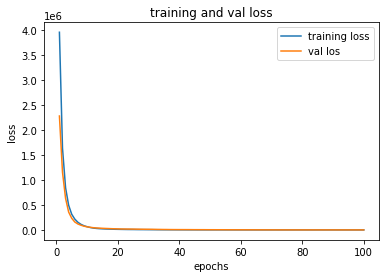

In [ ]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

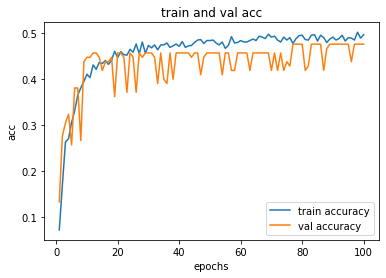

In [ ]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 8) 測試

In [ ]:
from sklearn.metrics import accuracy_score
label=np.argmax(y,axis=1)
pred =  np.argmax(model.predict(X), axis=1)
# print(pred.shape)
print(accuracy_score(label, pred))
# print(y)

0.49732620320855614


In [ ]:
!pip install eli5

## 9) 檢查特徵重要性
> https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html
> https://www.mdeditor.tw/pl/pgi5/zh-tw

> 針對BlackBox模型或非sklearn模型，使用排列重要性方法


> 捨棄重要性低、增加損失的features特徵，重新建模訓練。


> 














In [ ]:
# import numpy as np
from eli5.permutation_importance import get_score_importances

# ... load data, define score function
def score(X, y):
    y_pred = np.argmax(model.predict(X), axis=1)
    return accuracy_score(y, y_pred)

lab=np.argmax(y_train,axis=1)
base_score, score_decreases = get_score_importances(score, X_train.values, lab)
feature_importances = np.mean(score_decreases, axis=0)



In [ ]:
# print(feature_importances)
feature_importance_dict = {}
for i, feature_name in enumerate(X.columns.values.tolist()) :
	feature_importance_dict[feature_name]=feature_importances[i]

# print(dict(sorted(feature_importance_dict.items(), key=lambda x:x[1],reverse=True)[:5]))
sorted_fi = dict(sorted(feature_importance_dict.items(), key=lambda x:x[1],reverse=True))
for name,i in sorted_fi.items():
  print(name, i)

Ax.005馬達轉速0.01r/min 0.007831900668576853
Ax.007馬達轉速0.01r/min 0.00764087870105058
Ax.031馬達轉速0.01r/min 0.006876790830945523
Ax.014馬達轉速0.01r/min 0.006303724928366727
Ax.022馬達轉速0.01r/min 0.006112702960840455
Ax.012馬達轉速0.01r/min 0.005348615090735387
Ax.011馬達轉速0.01r/min 0.0051575931232091254
Ax.032馬達轉速0.01r/min 0.004966571155682875
Ax.027馬達轉速0.01r/min 0.004966571155682864
Ax.028馬達轉速0.01r/min 0.004966571155682864
Ax.029馬達轉速0.01r/min 0.004584527220630319
Ax.024馬達轉速0.01r/min 0.004202483285577796
Ax.016馬達轉速0.01r/min 0.003820439350525273
Ax.010馬達轉速0.01r/min 0.003629417382999023
Ax.009馬達轉速0.01r/min 0.0034383954154727503
Ax.017馬達轉速0.01r/min 0.0030563514804202163
Ax.003馬達轉速0.01r/min 0.0028653295128939216
Ax.025馬達轉速0.01r/min 0.0026743075453676823
Ax.026馬達轉速0.01r/min 0.0026743075453676823
Ax.019馬達轉速0.01r/min 0.0024832855778414097
Ax.023馬達轉速0.01r/min 0.0022922636103151484
Ax.002馬達轉速0.01r/min 0.001719197707736353
Ax.030馬達轉速0.01r/min 0.0015281757402100915
Ax.021馬達轉速0.01r/min 0.0013371537726838301
Ax.015馬